In [83]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
from glob import glob 

import pandas as pd

from fastcore.xtras import load_pickle
import matplotx
from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH

import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])
%matplotlib inline

## Load results

In [85]:
all_out = glob("out/**/*.pkl")

In [86]:
all_out = [load_pickle(p) for p in all_out]

In [87]:
all_out[0]

{'num_classes': 2,
 'num_train_points': 20,
 'accuracy': 0.49,
 'acc_macro': 0.49,
 'racc': 0.5,
 'kappa': -0.020000000000000018,
 'confusion_matrix': pycm.ConfusionMatrix(classes: [0, 1]),
 'f1_macro': 0.48872180451127817,
 'f1_micro': 0.49,
 'frac_valid': 1.0,
 'all_y_true': (#100) [1,1,1,1,0,1,1,0,0,0...],
 'all_y_pred': (#100) [0,0,1,0,1,1,1,0,0,1...],
 'valid_indices': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 'might_have_rounded_floats': Fal

In [88]:
extracted_res = []
baseline = []

for out in all_out: 
    res = {
        'train_size': out['num_train_points'],
        'frac_valid': out['frac_valid'],
        'accuracy': out['accuracy'],
        'f1_macro': out['f1_macro'],
        'f1_micro': out['f1_micro'],
        'kappa': out['kappa'],
        "num_classes": out['num_classes'],
        "representation": out['representation'] if 'representation' in out else "mofid",
    }

    baseline_res = {
        'train_size': out['num_train_points'], 
        'accuracy': out['baseline']['accuracy'], 
        'f1_macro': out['baseline']['f1_macro'],
        'f1_micro': out['baseline']['f1_micro'],
        'kappa': out['baseline']['kappa'],
        "num_classes": out['num_classes']
    }

    extracted_res.append(res)
    baseline.append(baseline_res)

In [89]:
res = pd.DataFrame(extracted_res)
baseline = pd.DataFrame(baseline)

In [90]:
grouped_res = res.groupby(['num_classes', 'train_size', "representation"]).agg(['mean', 'std', 'count'])

In [91]:
grouped_baseline_res = baseline.groupby(['num_classes', 'train_size']).agg(['mean', 'std', 'count'])

In [92]:
grouped_res

frac_valid             accuracy  \
                                            mean  std count      mean   
num_classes train_size representation                                   
2           10         grouped_mof           1.0  0.0     2  0.505000   
                       mofid                 1.0  0.0    10  0.553000   
            20         grouped_mof           1.0  0.0     2  0.570000   
                       mofid                 1.0  0.0    10  0.560000   
            50         grouped_mof           1.0  NaN     1  0.612903   
                       mofid                 1.0  0.0    10  0.573118   
            100        grouped_mof           1.0  NaN     1  0.604651   
                       mofid                 1.0  0.0     8  0.604651   
5           10         grouped_mof           1.0  0.0     2  0.180000   
                       mofid                 1.0  0.0    10  0.251000   
            20         grouped_mof           1.0  0.0     2  0.220000   
                       mofid                 1.0  0.0    10  0.256000   
            50         grouped_mof           1.0  NaN     1  0.215054   
                       mofid                 1.0  0.0    10  0.261290   
            100        grouped_mof           1.0  NaN     1  0.325581   
                       mofid                 1.0  0.0     8  0.287791   

                                                       f1_macro            \
                                            std count      mean       std   
num_classes train_size representation                                       
2           10         grouped_mof     0.007071     2  0.424517  0.104941   
                       mofid           0.055787    10  0.518027  0.080284   
            20         grouped_mof     0.042426     2  0.565322  0.048816   
                       mofid           0.050772    10  0.549742  0.047968   
            50         grouped_mof          NaN     1  0.610698       NaN   
                       mofid           0.064526    10  0.569785  0.065441   
            100        grouped_mof          NaN     1  0.603794       NaN   
                       mofid           0.035159     8  0.602092  0.035030   
5           10         grouped_mof     0.000000     2  0.137273  0.016205   
                       mofid           0.025144    10  0.215703  0.032994   
            20         grouped_mof     0.000000     2  0.204485  0.013128   
                       mofid           0.039497    10  0.230515  0.043017   
            50         grouped_mof          NaN     1  0.212713       NaN   
                       mofid           0.054369    10  0.247117  0.050583   
            100        grouped_mof          NaN     1  0.291014       NaN   
                       mofid           0.086960     8  0.278979  0.092790   

                                             f1_micro                  \
                                      count      mean       std count   
num_classes train_size representation                                   
2           10         grouped_mof        2  0.505000  0.007071     2   
                       mofid             10  0.553000  0.055787    10   
            20         grouped_mof        2  0.570000  0.042426     2   
                       mofid             10  0.560000  0.050772    10   
            50         grouped_mof        1  0.612903       NaN     1   
                       mofid             10  0.573118  0.064526    10   
            100        grouped_mof        1  0.604651       NaN     1   
                       mofid              8  0.604651  0.035159     8   
5           10         grouped_mof        2  0.180000  0.000000     2   
                       mofid             10  0.251000  0.025144    10   
            20         grouped_mof        2  0.220000  0.000000     2   
                       mofid             10  0.256000  0.039497    10   
            50         grouped_mof        1  0.215054       NaN     1   
                  

In [93]:
grouped_baseline_res

accuracy                  f1_macro                  \
                            mean       std count      mean       std count   
num_classes train_size                                                       
2           10          0.859167  0.028431    12  0.858204  0.029088    12   
            20          0.891667  0.033800    12  0.891164  0.034310    12   
            50          0.896383  0.016846    11  0.896286  0.016888    11   
            100         0.891473  0.020140     9  0.891268  0.020212     9   
5           10          0.670833  0.063024    12  0.669607  0.064364    12   
            20          0.719167  0.062589    12  0.716896  0.061756    12   
            50          0.748778  0.026458    11  0.748307  0.025304    11   
            100         0.785530  0.084475     9  0.783248  0.086695     9   

                        f1_micro                     kappa                  
                            mean       std count      mean       std count  
num_classes train_size                                                      
2           10          0.859167  0.028431    12  0.718333  0.056862    12  
            20          0.891667  0.033800    12  0.783333  0.067600    12  
            50          0.896383  0.016846    11  0.792747  0.033659    11  
            100         0.891473  0.020140     9  0.782772  0.040372     9  
5           10          0.670833  0.063024    12  0.588542  0.078779    12  
            20          0.719167  0.062589    12  0.648958  0.078237    12  
            50          0.748778  0.026458    11  0.686143  0.033031    11  
            100         0.785530  0.084475     9  0.732364  0.105273     9

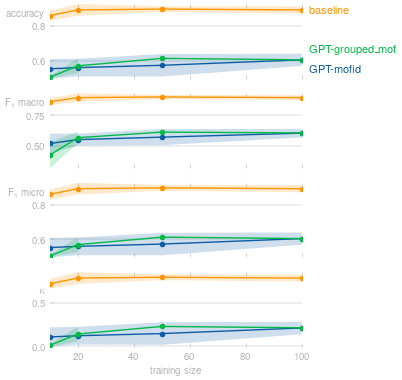

In [94]:

with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex='all')

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[2,:, "mofid"].index,
            grouped_res.loc[2,:,"mofid"][metric]['mean'],
            marker='o',
            label='GPT-mofid',
        )
        ax[i].fill_between(
            grouped_res.loc[2,:,"mofid"].index,
            grouped_res.loc[2,:,"mofid"][metric]['mean'] - grouped_res.loc[2,:,"mofid"][metric]['std'],
            grouped_res.loc[2,:,"mofid"][metric]['mean'] + grouped_res.loc[2,:,"mofid"][metric]['std'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_res.loc[2,:, "grouped_mof"].index,
            grouped_res.loc[2,:,"grouped_mof"][metric]['mean'],
            marker='o',
            label='GPT-grouped_mof',
        )
        ax[i].fill_between(
            grouped_res.loc[2,:,"grouped_mof"].index,
            grouped_res.loc[2,:,"grouped_mof"][metric]['mean'] - grouped_res.loc[2,:,"grouped_mof"][metric]['std'],
            grouped_res.loc[2,:,"grouped_mof"][metric]['mean'] + grouped_res.loc[2,:,"grouped_mof"][metric]['std'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_baseline_res.loc[2,:].index,
            grouped_baseline_res.loc[2,:][metric]['mean'],
            marker='o',
            label='baseline'
        )
        ax[i].fill_between(
            grouped_baseline_res.loc[2,:].index,
            grouped_baseline_res.loc[2,:][metric]['mean'] - grouped_baseline_res.loc[2,:][metric]['std'],
            grouped_baseline_res.loc[2,:][metric]['mean'] + grouped_baseline_res.loc[2,:][metric]['std'],
            alpha=0.2,
        )


    ax[-1].set_xlabel('training size', labelpad=4)
    #ax[0].legend()
    

    matplotx.line_labels(ax[0], fontsize=8) 
    

    matplotx.ylabel_top('accuracy', ax=ax[0])
    matplotx.ylabel_top(r'F$_{1}$ macro', ax=ax[1])
    matplotx.ylabel_top(r'F$_{1}$ micro', ax=ax[2])
    matplotx.ylabel_top(r'$\kappa$', ax=ax[3])

    #fig.tight_layout()
    fig.savefig('cv-classification_results_2.pdf', bbox_inches='tight')

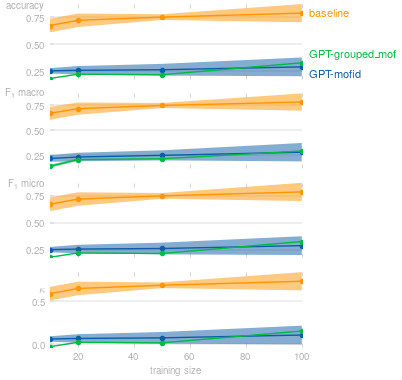

In [95]:

with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex='all')

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[5,:, "mofid"].index,
            grouped_res.loc[5,:,"mofid"][metric]['mean'],
            marker='o',
            label='GPT-mofid',
        )
        ax[i].fill_between(
            grouped_res.loc[5,:,"mofid"].index,
            grouped_res.loc[5,:,"mofid"][metric]['mean'] - grouped_res.loc[5,:,"mofid"][metric]['std'],
            grouped_res.loc[5,:,"mofid"][metric]['mean'] + grouped_res.loc[5,:,"mofid"][metric]['std'],
            alpha=0.5,
        )

        ax[i].plot(
            grouped_res.loc[5,:, "grouped_mof"].index,
            grouped_res.loc[5,:,"grouped_mof"][metric]['mean'],
            marker='o',
            label='GPT-grouped_mof',
        )
        ax[i].fill_between(
            grouped_res.loc[5,:,"grouped_mof"].index,
            grouped_res.loc[5,:,"grouped_mof"][metric]['mean'] - grouped_res.loc[5,:,"grouped_mof"][metric]['std'],
            grouped_res.loc[5,:,"grouped_mof"][metric]['mean'] + grouped_res.loc[5,:,"grouped_mof"][metric]['std'],
            alpha=0.5,
        )

        ax[i].plot(
            grouped_baseline_res.loc[5,:].index,
            grouped_baseline_res.loc[5,:][metric]['mean'],
            marker='o',
            label='baseline'
        )
        ax[i].fill_between(
            grouped_baseline_res.loc[5,:].index,
            grouped_baseline_res.loc[5,:][metric]['mean'] - grouped_baseline_res.loc[5,:][metric]['std'],
            grouped_baseline_res.loc[5,:][metric]['mean'] + grouped_baseline_res.loc[5,:][metric]['std'],
            alpha=0.5,
        )


    ax[-1].set_xlabel('training size', labelpad=4)
    #ax[0].legend()
    

    matplotx.line_labels(ax[0], fontsize=8) 
    

    matplotx.ylabel_top('accuracy', ax=ax[0])
    matplotx.ylabel_top(r'F$_{1}$ macro', ax=ax[1])
    matplotx.ylabel_top(r'F$_{1}$ micro', ax=ax[2])
    matplotx.ylabel_top(r'$\kappa$', ax=ax[3])

    #fig.tight_layout()
    fig.savefig('cv-classification_results_5.pdf', bbox_inches='tight')